# Tree-Based Intelligent Intrusion Detection System in Internet of Vehicles 
This is the code for the paper entitled "[**Tree-Based Intelligent Intrusion Detection System in Internet of Vehicles**](https://arxiv.org/pdf/1910.08635.pdf)" published in IEEE GlobeCom 2019.  
Authors: Li Yang (liyanghart@gmail.com), Abdallah Moubayed, Ismail Hamieh, and Abdallah Shami  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

L. Yang, A. Moubayed, I. Hamieh and A. Shami, "Tree-Based Intelligent Intrusion Detection System in Internet of Vehicles," 2019 IEEE Global Communications Conference (GLOBECOM), 2019, pp. 1-6, doi: 10.1109/GLOBECOM38437.2019.9013892.  

## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import time
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #,Imputer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import balanced_accuracy_score

In [4]:
#Read dataset
df = pd.read_csv('datasetwithoutexploit.csv')

In [5]:
df['Attack'].value_counts()

Benign            41002
ddos               2506
scanning           2500
Reconnaissance     2498
dos                2497
ransomware         2493
Infilteration      2491
Fuzzers            2490
Bot                2489
Generic            2487
backdoor           2485
bruteforce         2485
mitm               2471
xss                2457
injection          2443
Theft              2431
Analysis           2299
Shellcode          1427
Name: Attack, dtype: int64

In [6]:
# Groupement des classes
attack_group = {'Infilteration': 'Web attack', 
                'Fuzzers': 'Web attack',
                'Generic': 'Web attack',
                'injection': 'Web attack', 
                'Analysis': 'Web attack',
                'xss': 'Web attack',
                'Benign': 'BENIGN',
                'backdoor': 'BACKDOOR', 
                'scanning': 'SCANNING',
                'mitm': 'MITM', 
                'dos': 'DOS', 
                'ddos': 'DDOS', 
                'bruteforce': 'BRUTEFORCE', 
                'Theft': 'THEFT', 
                'Reconnaissance': 'RECON',
                'Shellcode': 'SHELLCODE',
                'ransomware': 'RANSOMWARE',
                'Bot': 'BOT',
                }
# Creation d'une colomne Attack catégorie
df['Attack_Category'] = df['Attack'].map(lambda x: attack_group[x])
df['Attack_Category'].value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BACKDOOR       2485
BRUTEFORCE     2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [7]:
df.Attack.value_counts()

Benign            41002
ddos               2506
scanning           2500
Reconnaissance     2498
dos                2497
ransomware         2493
Infilteration      2491
Fuzzers            2490
Bot                2489
Generic            2487
backdoor           2485
bruteforce         2485
mitm               2471
xss                2457
injection          2443
Theft              2431
Analysis           2299
Shellcode          1427
Name: Attack, dtype: int64

In [8]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Attack_Category
0,0.582666,0.006790,0.023529,0.172269,0.000048,0.000264,0.000002,0.000246,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,ransomware,RANSOMWARE
1,0.583490,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,ransomware,RANSOMWARE
2,0.672023,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,ransomware,RANSOMWARE
3,0.523156,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,ransomware,RANSOMWARE
4,0.578912,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,ransomware,RANSOMWARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81946,0.643442,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,Reconnaissance,RECON
81947,0.675822,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,Reconnaissance,RECON
81948,0.642741,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,Reconnaissance,RECON
81949,0.624186,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,Reconnaissance,RECON


In [7]:
# verifier s'il y a des champs vides
df.isnull().any().any()

False

### split train set and test set

In [8]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Attack','Label','Attack_Category'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [9]:
X_train.shape

(65560, 41)

In [10]:
pd.Series(y_train).value_counts()

1     32801
12    11733
4      2005
9      2000
5      1998
8      1998
7      1994
2      1991
0      1988
3      1988
6      1977
11     1945
10     1142
dtype: int64

### Oversampling by SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={10:2000}) #'Worms':2001,'Shellcode' Create 1500 samples for the minority class "4"

In [10]:
X_train, y_train = smote.fit_sample(X_train, y_train)

In [11]:
pd.Series(y_train).value_counts()

1     32801
12    11733
4      2005
9      2000
10     2000
5      1998
8      1998
7      1994
2      1991
0      1988
3      1988
6      1977
11     1945
dtype: int64

## Machine learning model training

### Training four base learners: decision tree, random forest, extra trees, XGBoost

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
L4_SRC_PORT,81951.0,0.671904,0.279401,0.0,5.725795e-01,7.703365e-01,8.638666e-01,1.000000
L4_DST_PORT,81951.0,0.072455,0.179960,0.0,8.087282e-04,1.221113e-03,5.171283e-02,1.000000
PROTOCOL,81951.0,0.122625,0.188175,0.0,2.352941e-02,6.666667e-02,8.771930e-02,1.000000
L7_PROTO,81951.0,0.090797,0.190567,0.0,0.000000e+00,0.000000e+00,2.941176e-02,1.000000
IN_BYTES,81951.0,0.000091,0.006082,0.0,2.541565e-07,1.391334e-06,8.181419e-06,1.000000
IN_PKTS,81951.0,0.000183,0.004271,0.0,0.000000e+00,2.034505e-05,8.949881e-05,1.000000
OUT_BYTES,81951.0,0.000136,0.008454,0.0,2.030677e-07,6.092030e-07,6.092030e-06,1.000000
OUT_PKTS,81951.0,0.000215,0.005907,0.0,2.433664e-06,2.714176e-05,1.194237e-04,1.000000
TCP_FLAGS,81951.0,0.175316,0.317781,0.0,0.000000e+00,8.520179e-02,1.210762e-01,1.000000
CLIENT_TCP_FLAGS,81951.0,0.160961,0.318949,0.0,0.000000e+00,8.968610e-03,1.210762e-01,1.000000


temps entrainement: 0.9228897094726562
temps prediction: 0.0059850215911865234
Exactitude de DT: 0.9898724910011591
Précision de DT: 0.9898734513469482
Taux de détection of DT: 0.9898724910011591
F1-score de DT: 0.9898276561268682
              precision    recall  f1-score   support

    BACKDOOR       0.97      0.90      0.93       497
      BENIGN       1.00      1.00      1.00      8201
         BOT       1.00      1.00      1.00       498
  BRUTEFORCE       1.00      1.00      1.00       497
        DDOS       1.00      1.00      1.00       501
         DOS       0.99      1.00      1.00       499
        MITM       0.94      0.94      0.94       494
  RANSOMWARE       0.98      0.99      0.98       499
       RECON       1.00      1.00      1.00       500
    SCANNING       0.98      0.98      0.98       500
   SHELLCODE       1.00      0.99      0.99       285
       THEFT       0.99      0.98      0.98       486
  Web attack       0.97      0.98      0.98      2934

    accurac

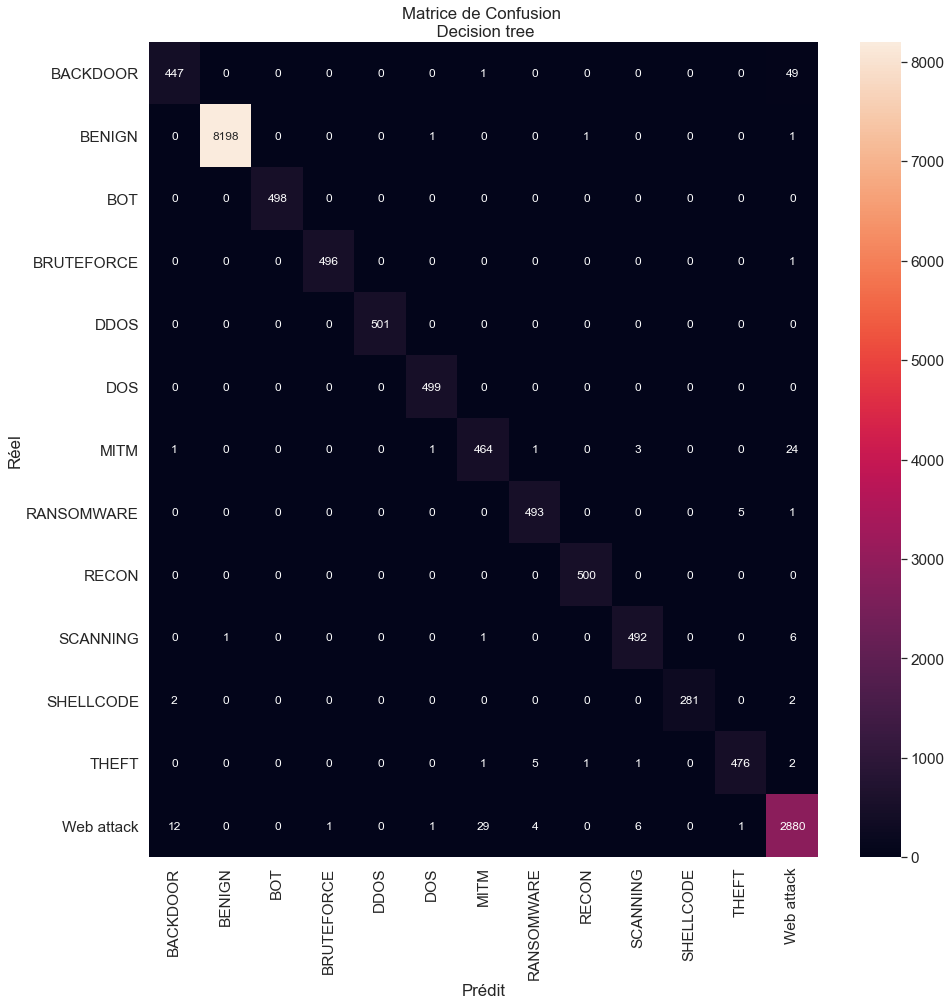

In [19]:
# fit with smote
dt = DecisionTreeClassifier(random_state = 0)
start = time.time()
dt.fit(X_train,y_train) 
end = time.time()
training_time_DT = end - start

# predict
start = time.time()
y_predict = dt.predict(X_test)
end = time.time()
predict_time_DT = end  - start
print('temps entrainement: '+ str(training_time_DT))
print('temps prediction: '+ str(predict_time_DT))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_DT, recall_DT, fscore_DT, n = score(y_test, y_predict, average = 'weighted')
accuracy_DT = accuracy_score(y_test, y_predict)
baccuracy=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of DT: '+ str(baccuracy))
print('Exactitude de DT: '+ str(accuracy_DT))
print('Précision de DT: '+(str(precision_DT)))
print('Taux de détection of DT: '+(str(recall_DT)))
print('F1-score de DT: '+(str(fscore_DT)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 12}, fmt='g')
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n Decision tree')
plt.show()

In [22]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

temps entrainement: 7.53841757774353
temps prediction: 0.3564736843109131
Exactitude de RT: 0.9918857909828565
Précision de RT: 0.9919180651748929
Taux de détection de RT: 0.9918857909828565
F1-score de RT: 0.9918138445452362
              precision    recall  f1-score   support

    BACKDOOR       0.98      0.90      0.94       497
      BENIGN       1.00      1.00      1.00      8201
         BOT       1.00      1.00      1.00       498
  BRUTEFORCE       1.00      1.00      1.00       497
        DDOS       1.00      1.00      1.00       501
         DOS       1.00      1.00      1.00       499
        MITM       0.97      0.94      0.95       494
  RANSOMWARE       0.98      0.98      0.98       499
       RECON       1.00      1.00      1.00       500
    SCANNING       0.99      0.99      0.99       500
   SHELLCODE       1.00      1.00      1.00       285
       THEFT       0.99      0.99      0.99       486
  Web attack       0.97      0.99      0.98      2934

    accuracy    

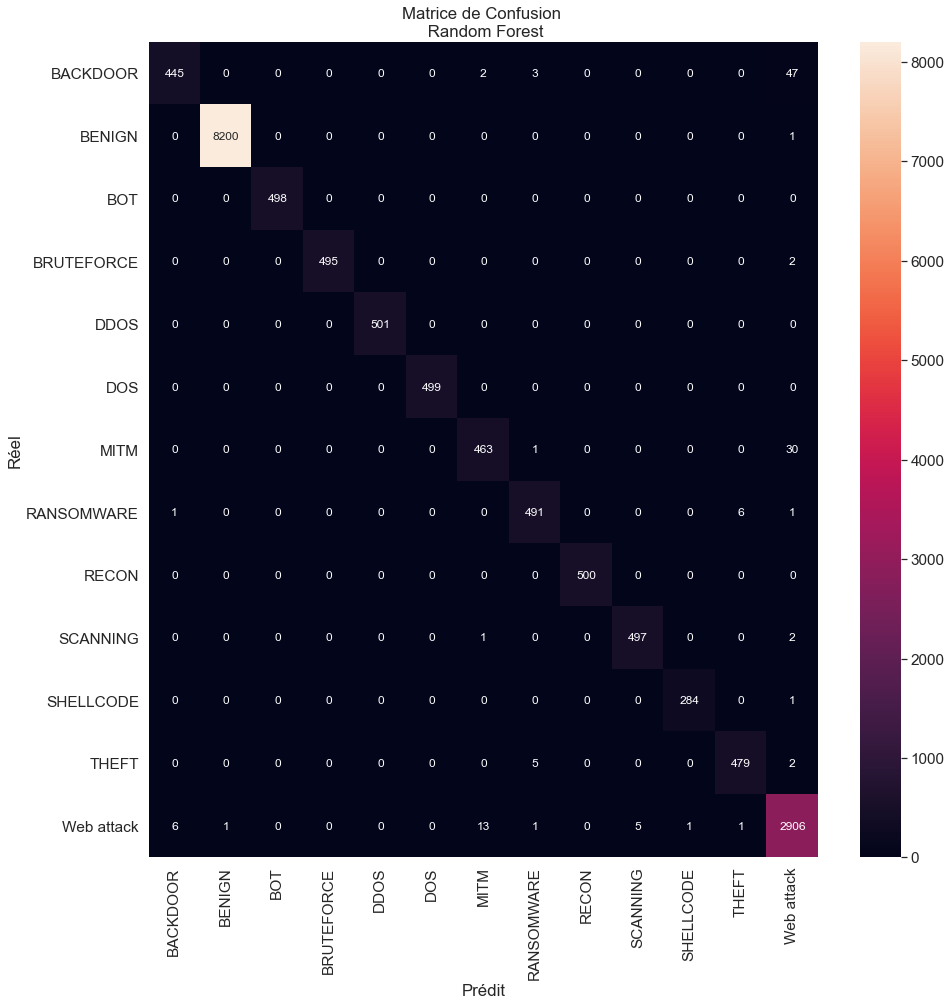

In [20]:
# fit with smote
rf = RandomForestClassifier(random_state = 0)
start = time.time()
rf.fit(X_train,y_train) 
end = time.time()
training_time_RF = end - start

# predict
start = time.time()
y_predict = rf.predict(X_test)
end = time.time()
predict_time_RF = end  - start
print('temps entrainement: '+ str(training_time_RF))
print('temps prediction: '+ str(predict_time_RF))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_RF, recall_RF, fscore_RF, n = score(y_test, y_predict, average = 'weighted')
accuracy_RF = accuracy_score(y_test, y_predict)
baccuracy=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of DT: '+ str(baccuracy))
print('Exactitude de RT: '+ str(accuracy_RF))
print('Précision de RT: '+(str(precision_RF)))
print('Taux de détection de RT: '+(str(recall_RF)))
print('F1-score de RT: '+(str(fscore_RF)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 12}, fmt='g')
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n Random Forest')
plt.show()

In [57]:
# Hyperparameter optimization of random forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 1, 100, 1),
    "max_features":hp.quniform('max_features', 1, 41, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,20,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,20,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 30/30 [15:59<00:00, 31.97s/trial, best loss: -0.9922518455249832]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 81.0, 'max_features': 30.0, 'min_samples_leaf': 1.0, 'min_samples_split': 7.0, 'n_estimators': 146.0}


temps entrainement: 56.820757150650024
temps prediction: 0.43779420852661133
Exactitude de RT: 0.9919468000732109
Précision de RT: 0.9920084544633118
Taux de détection de RT: 0.9919468000732109
F1-score de RT: 0.9918818315051711
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       497
           1       1.00      1.00      1.00      8201
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       497
           4       1.00      1.00      1.00       501
           5       1.00      1.00      1.00       499
           6       0.96      0.94      0.95       494
           7       0.98      0.99      0.99       499
           8       1.00      0.99      1.00       500
           9       0.99      0.99      0.99       500
          10       1.00      0.99      0.99       285
          11       0.99      0.99      0.99       486
          12       0.97      0.99      0.98      2934

    accuracy 

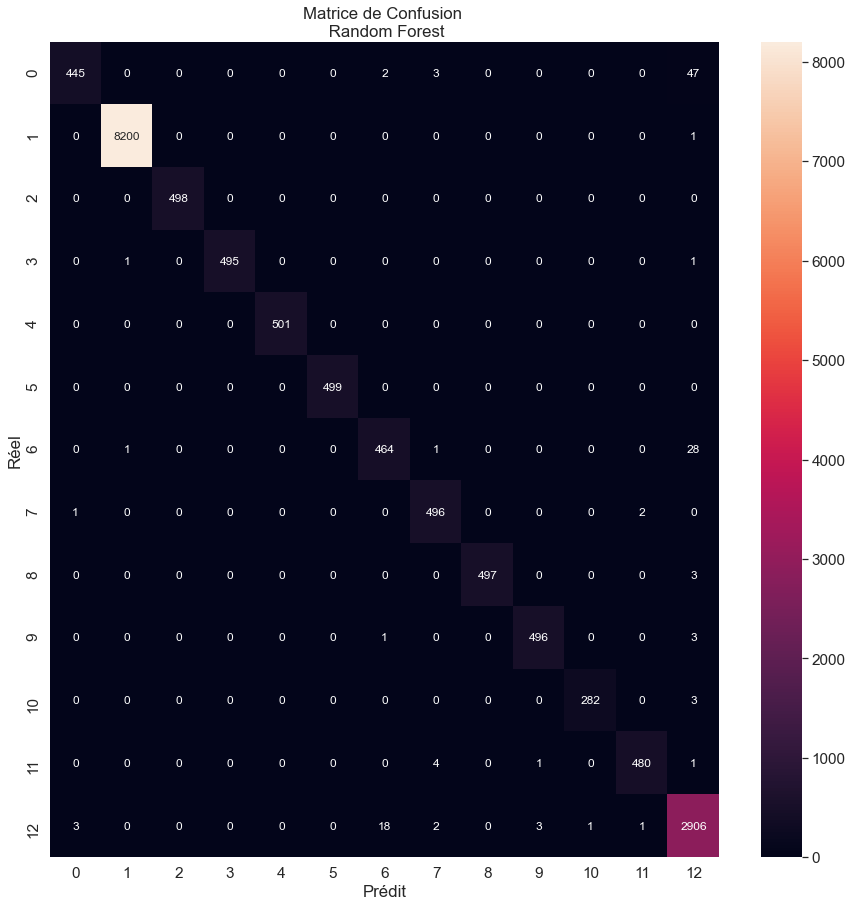

In [58]:
rf_hpo = RandomForestClassifier(n_estimators = 146, min_samples_leaf = 1, max_depth = 81, min_samples_split = 7, max_features = 30, criterion = 'entropy')
start = time.time()
rf_hpo.fit(X_train,y_train) 
end = time.time()
training_time_rf_hpo = end - start
# predict
start = time.time()
y_predict = rf_hpo.predict(X_test)
end = time.time()
predict_time_rf_hpo = end  - start
print('temps entrainement: '+ str(training_time_rf_hpo))
print('temps prediction: '+ str(predict_time_rf_hpo))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_rf_hpo, recall_rf_hpo, fscore_rf_hpo, n = score(y_test, y_predict, average = 'weighted')
accuracy_rf_hpo = accuracy_score(y_test, y_predict)
baccuracy=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of DT: '+ str(baccuracy))
print('Exactitude de RT: '+ str(accuracy_rf_hpo))
print('Précision de RT: '+(str(precision_rf_hpo)))
print('Taux de détection de RT: '+(str(recall_rf_hpo)))
print('F1-score de RT: '+(str(fscore_rf_hpo)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 12}, fmt='g')
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n Random Forest')
plt.show()

In [21]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

temps entrainement: 6.88158917427063
temps prediction: 0.33760905265808105
Exactitude de ET: 0.9916417546214386
Précision de ET: 0.9916918812599621
Taux de détection de ET: 0.9916417546214386
F1-score de ET: 0.9915714068079168
              precision    recall  f1-score   support

    BACKDOOR       0.98      0.89      0.94       497
      BENIGN       1.00      1.00      1.00      8201
         BOT       1.00      1.00      1.00       498
  BRUTEFORCE       1.00      1.00      1.00       497
        DDOS       1.00      1.00      1.00       501
         DOS       1.00      1.00      1.00       499
        MITM       0.96      0.94      0.95       494
  RANSOMWARE       0.99      0.98      0.99       499
       RECON       1.00      1.00      1.00       500
    SCANNING       0.99      0.99      0.99       500
   SHELLCODE       0.99      0.98      0.98       285
       THEFT       0.99      0.99      0.99       486
  Web attack       0.97      0.99      0.98      2934

    accuracy   

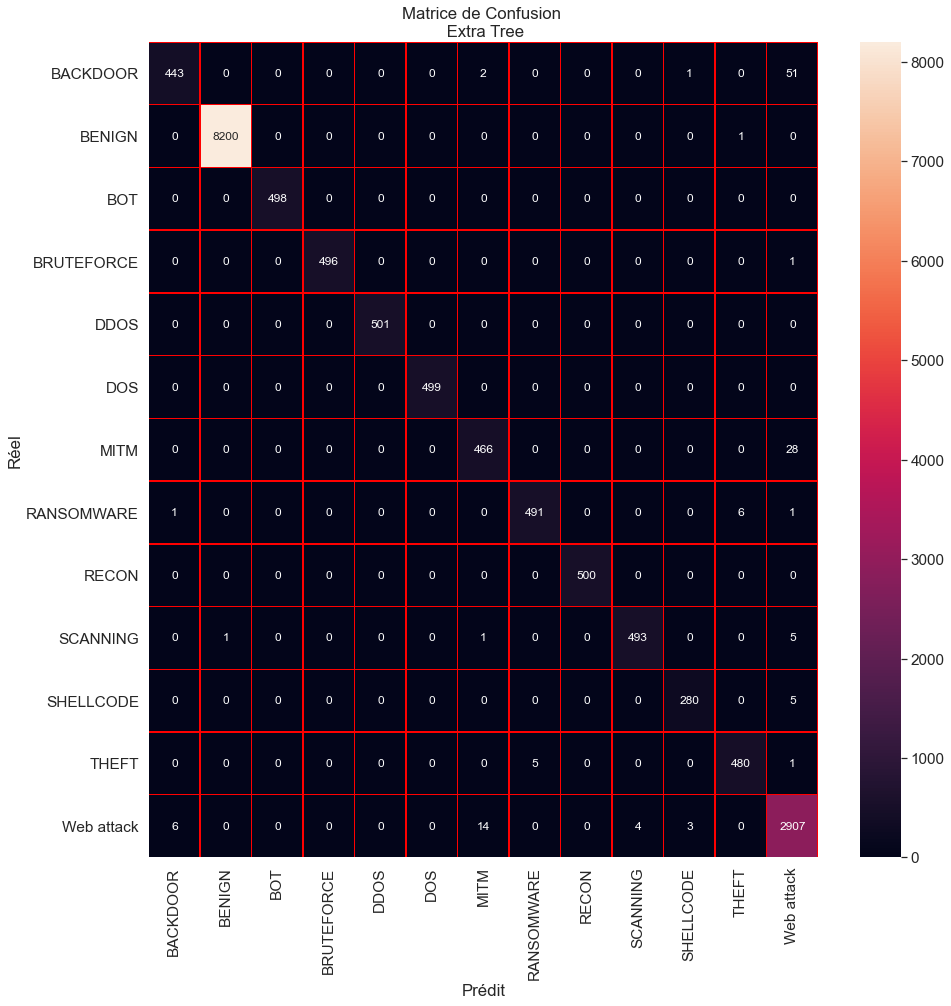

In [23]:
# fit Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
start = time.time()
et.fit(X_train,y_train) 
end = time.time()
training_time_ET = end - start

# predict
start = time.time()
y_predict = et.predict(X_test)
end = time.time()
predict_time_ET = end  - start
print('temps entrainement: '+ str(training_time_ET))
print('temps prediction: '+ str(predict_time_ET))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_ET, recall_ET, fscore_ET, n = score(y_test, y_predict, average = 'weighted')
accuracy_ET = accuracy_score(y_test, y_predict)
baccuracy_ET=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of ET: '+ str(baccuracy_ET))
print('Exactitude de ET: '+ str(accuracy_ET))
print('Précision de ET: '+(str(precision_ET)))
print('Taux de détection de ET: '+(str(recall_ET)))
print('F1-score de ET: '+(str(fscore_ET)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, linecolor="red",linewidth=0.5,annot_kws={"size": 12}, fmt=".0f") #fmt='g'
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n Extra Tree')
plt.show()

In [24]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

temps entrainement: 343.33464789390564
temps prediction: 0.313173770904541
Exactitude de GB: 0.9903605637239948
Précision de GB: 0.9905185880783326
Taux de détection GB: 0.9903605637239948
F1-score de GB: 0.9902596744940465
              precision    recall  f1-score   support

    BACKDOOR       0.99      0.89      0.94       497
      BENIGN       1.00      1.00      1.00      8201
         BOT       1.00      1.00      1.00       498
  BRUTEFORCE       1.00      1.00      1.00       497
        DDOS       1.00      1.00      1.00       501
         DOS       1.00      0.99      0.99       499
        MITM       0.97      0.89      0.93       494
  RANSOMWARE       0.98      1.00      0.99       499
       RECON       1.00      1.00      1.00       500
    SCANNING       1.00      0.98      0.99       500
   SHELLCODE       0.99      0.99      0.99       285
       THEFT       1.00      0.99      0.99       486
  Web attack       0.96      0.99      0.98      2934

    accuracy      

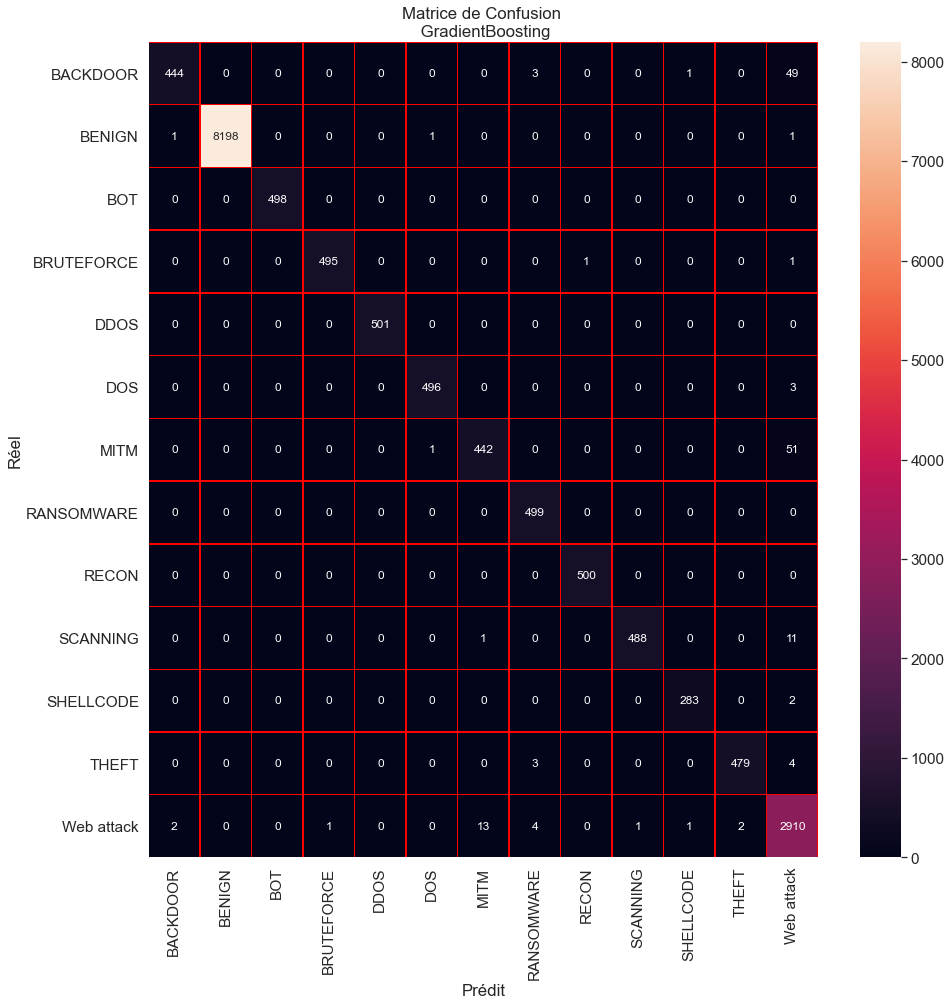

In [25]:
# fit GradientBoosting training and prediction
Gb = GradientBoostingClassifier(n_estimators=100,random_state = 0)
start = time.time()
Gb.fit(X_train,y_train) 
end = time.time()
training_time_GB = end - start

# predict
start = time.time()
y_predict = Gb.predict(X_test)
end = time.time()
predict_time_GB = end  - start
print('temps entrainement: '+ str(training_time_GB))
print('temps prediction: '+ str(predict_time_GB))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_GB, recall_GB, fscore_GB, n = score(y_test, y_predict, average = 'weighted')
accuracy_GB = accuracy_score(y_test, y_predict)
baccuracy_GB=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of ET: '+ str(baccuracy))
print('Exactitude de GB: '+ str(accuracy_GB))
print('Précision de GB: '+(str(precision_GB)))
print('Taux de détection GB: '+(str(recall_GB)))
print('F1-score de GB: '+(str(fscore_GB)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, linecolor="red",linewidth=0.5,annot_kws={"size": 12}, fmt=".0f") #fmt='g'
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n GradientBoosting')
plt.show()

In [22]:
gb_train=Gb.predict(X_train)
gb_test=Gb.predict(X_test)

temps entrainement: 61.893781661987305
temps prediction: 0.16089940071105957
Exactitude de XGboost : 0.99261790006711
Précision de XGboost : 0.9926726106196788
Taux de détection XGboost : 0.99261790006711
F1-score de XGboost : 0.9925497987469346
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       497
           1       1.00      1.00      1.00      8201
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       497
           4       1.00      1.00      1.00       501
           5       1.00      1.00      1.00       499
           6       0.96      0.95      0.96       494
           7       0.99      1.00      0.99       499
           8       1.00      1.00      1.00       500
           9       0.99      0.99      0.99       500
          10       0.99      0.99      0.99       285
          11       1.00      0.99      0.99       486
          12       0.97      0.99      0.98      29

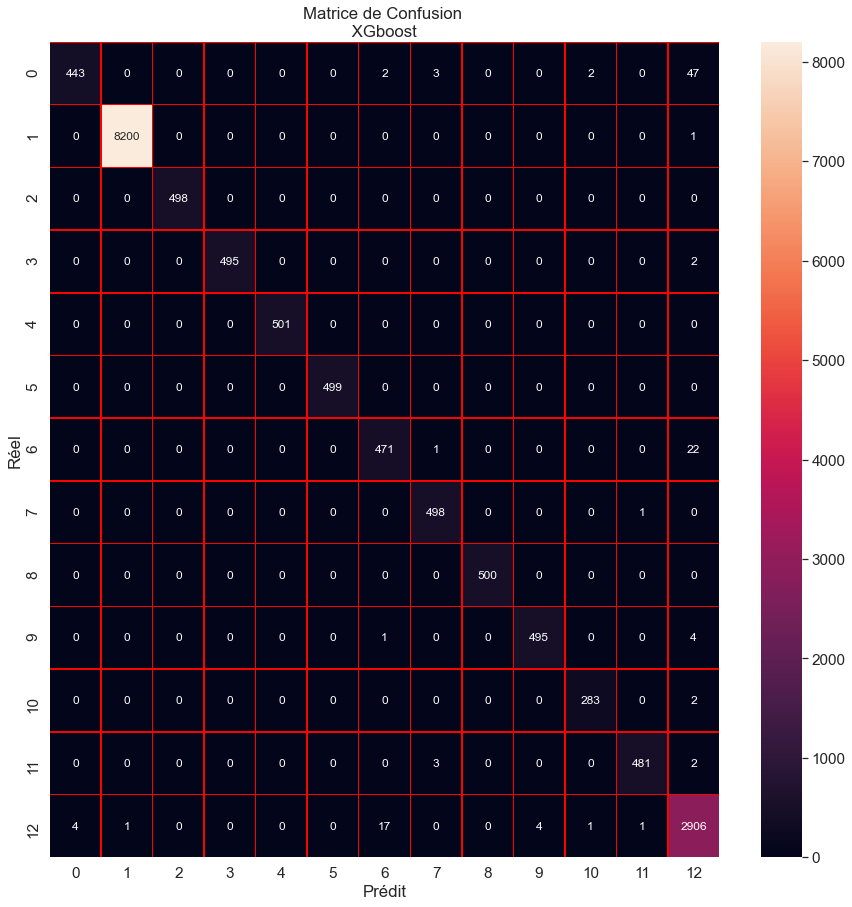

In [11]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 100)
start = time.time()
xg.fit(X_train,y_train) 
end = time.time()
training_time_XG = end - start

# predict
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
predict_time_XG = end  - start
print('temps entrainement: '+ str(training_time_XG))
print('temps prediction: '+ str(predict_time_XG))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_XG, recall_XG, fscore_XG, n = score(y_test, y_predict, average = 'weighted')
accuracy_XG = accuracy_score(y_test, y_predict)
baccuracy_XG=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of ET: '+ str(baccuracy))
print('Exactitude de XGboost : '+ str(accuracy_XG))
print('Précision de XGboost : '+(str(precision_XG)))
print('Taux de détection XGboost : '+(str(recall_XG)))
print('F1-score de XGboost : '+(str(fscore_XG)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, linecolor="red",linewidth=0.5,annot_kws={"size": 12}, fmt=".0f") #fmt='g'
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n XGboost ')
plt.show()

In [13]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate']))                                    
        
           }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'learning_rate': hp.normal('learning_rate', 0.05, 0.5)   
   }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

[00:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parame

[00:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


100%|██████████| 20/20 [27:22<00:00, 82.11s/trial, best loss: -0.9928619364285278]
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.13328818977781692, 'max_depth': 8.0, 'min_samples_leaf': 4.0, 'min_samples_split': 8.0, 'n_estimators': 150.0}


[01:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


temps entrainement: 119.6605339050293
temps prediction: 0.37282609939575195
Exactitude de XGboost : 0.9928619364285278
Précision de XGboost : 0.9929124426506029
Taux de détection XGboost : 0.9928619364285278
F1-score de XGboost : 0.9927916829113058
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       497
           1       1.00      1.00      1.00      8201
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       497
           4       1.00      1.00 

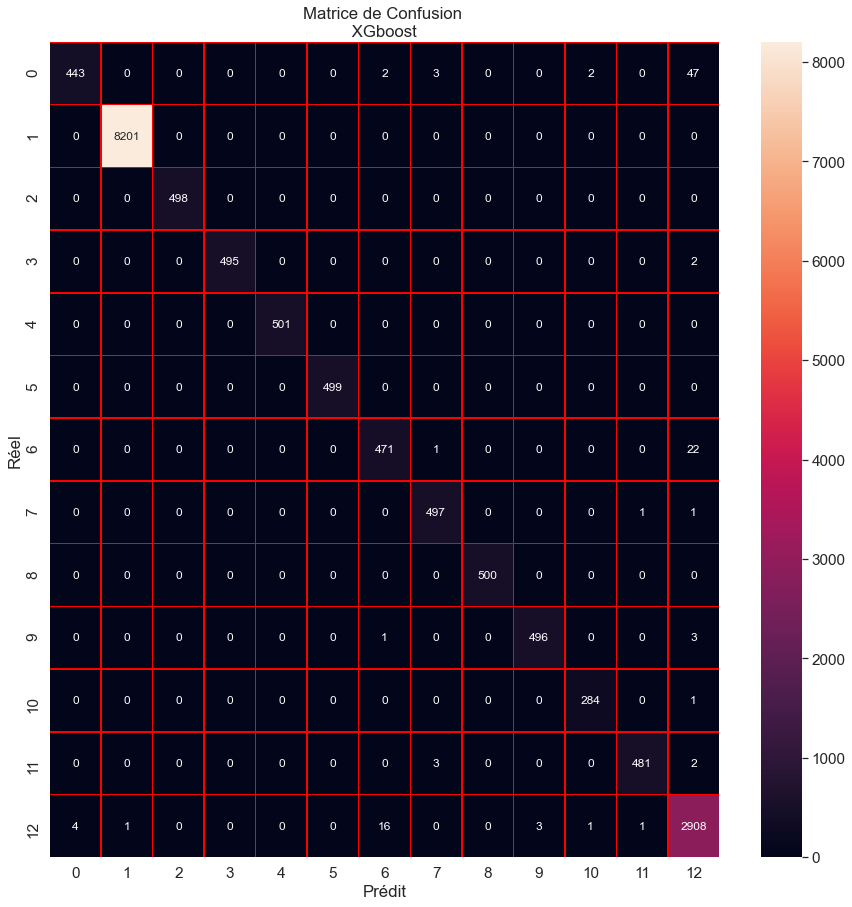

In [14]:
# XGboost training and prediction
xg = xgb.XGBClassifier(learning_rate= 0.13328818977781692, n_estimators = 150, max_depth = 8,min_samples_leaf= 4,min_samples_split=8)
start = time.time()
xg.fit(X_train,y_train) 
end = time.time()
training_time_XG = end - start

# predict
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
predict_time_XG = end  - start
print('temps entrainement: '+ str(training_time_XG))
print('temps prediction: '+ str(predict_time_XG))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_XG, recall_XG, fscore_XG, n = score(y_test, y_predict, average = 'weighted')
accuracy_XG = accuracy_score(y_test, y_predict)
baccuracy_XG=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of ET: '+ str(baccuracy))
print('Exactitude de XGboost : '+ str(accuracy_XG))
print('Précision de XGboost : '+(str(precision_XG)))
print('Taux de détection XGboost : '+(str(recall_XG)))
print('F1-score de XGboost : '+(str(fscore_XG)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, linecolor="red",linewidth=0.5,annot_kws={"size": 12}, fmt=".0f") #fmt='g'
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n XGboost ')
plt.show()

temps entrainement: 107.72272729873657
temps prediction: 0.2409975528717041
Exactitude de XGboost : 0.9928619364285278
Précision de XGboost : 0.9929124426506029
Taux de détection XGboost : 0.9928619364285278
F1-score de XGboost : 0.9927916829113058
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       497
           1       1.00      1.00      1.00      8201
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       497
           4       1.00      1.00      1.00       501
           5       1.00      1.00      1.00       499
           6       0.96      0.95      0.96       494
           7       0.99      1.00      0.99       499
           8       1.00      1.00      1.00       500
           9       0.99      0.99      0.99       500
          10       0.99      1.00      0.99       285
          11       1.00      0.99      0.99       486
          12       0.97      0.99      0.98     

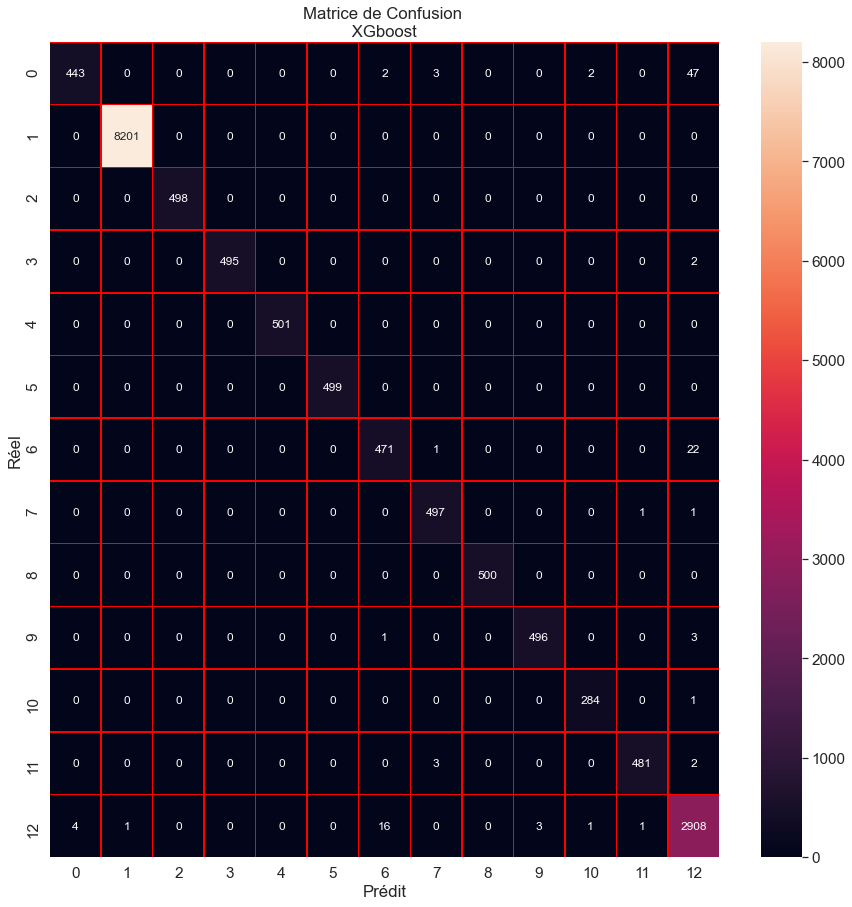

In [15]:
# XGboost training and prediction
xg = xgb.XGBClassifier(learning_rate= 0.13328818977781692, n_estimators = 150, max_depth = 8)
start = time.time()
xg.fit(X_train,y_train) 
end = time.time()
training_time_XG = end - start

# predict
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
predict_time_XG = end  - start
print('temps entrainement: '+ str(training_time_XG))
print('temps prediction: '+ str(predict_time_XG))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_XG, recall_XG, fscore_XG, n = score(y_test, y_predict, average = 'weighted')
accuracy_XG = accuracy_score(y_test, y_predict)
baccuracy_XG=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of ET: '+ str(baccuracy))
print('Exactitude de XGboost : '+ str(accuracy_XG))
print('Précision de XGboost : '+(str(precision_XG)))
print('Taux de détection XGboost : '+(str(recall_XG)))
print('F1-score de XGboost : '+(str(fscore_XG)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, linecolor="red",linewidth=0.5,annot_kws={"size": 12}, fmt=".0f") #fmt='g'
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n XGboost ')
plt.show()

In [18]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'learning_rate':  abs(float(params['learning_rate'])),
        
                                       
        
           }
    clf = xgb.XGBClassifier( **params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'learning_rate': hp.normal('learning_rate', 0.05, 0.5),
    
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("XGBoost: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [29:16<00:00, 87.83s/trial, best loss: -0.9927399182478189] 
XGBoost: Hyperopt estimated optimum {'learning_rate': -0.1033396951784816, 'max_depth': 12.0, 'n_estimators': 100.0}


temps entrainement: 95.78335809707642
temps prediction: 0.18079638481140137
Exactitude de XGboost : 0.9927399182478189
Précision de XGboost : 0.992792284179905
Taux de détection XGboost : 0.9927399182478189
F1-score de XGboost : 0.9926684257240384
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       497
           1       1.00      1.00      1.00      8201
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       497
           4       1.00      1.00      1.00       501
           5       1.00      1.00      1.00       499
           6       0.96      0.95      0.96       494
           7       0.98      1.00      0.99       499
           8       1.00      1.00      1.00       500
           9       0.99      0.99      0.99       500
          10       0.99      1.00      0.99       285
          11       1.00      0.99      0.99       486
          12       0.97      0.99      0.98      

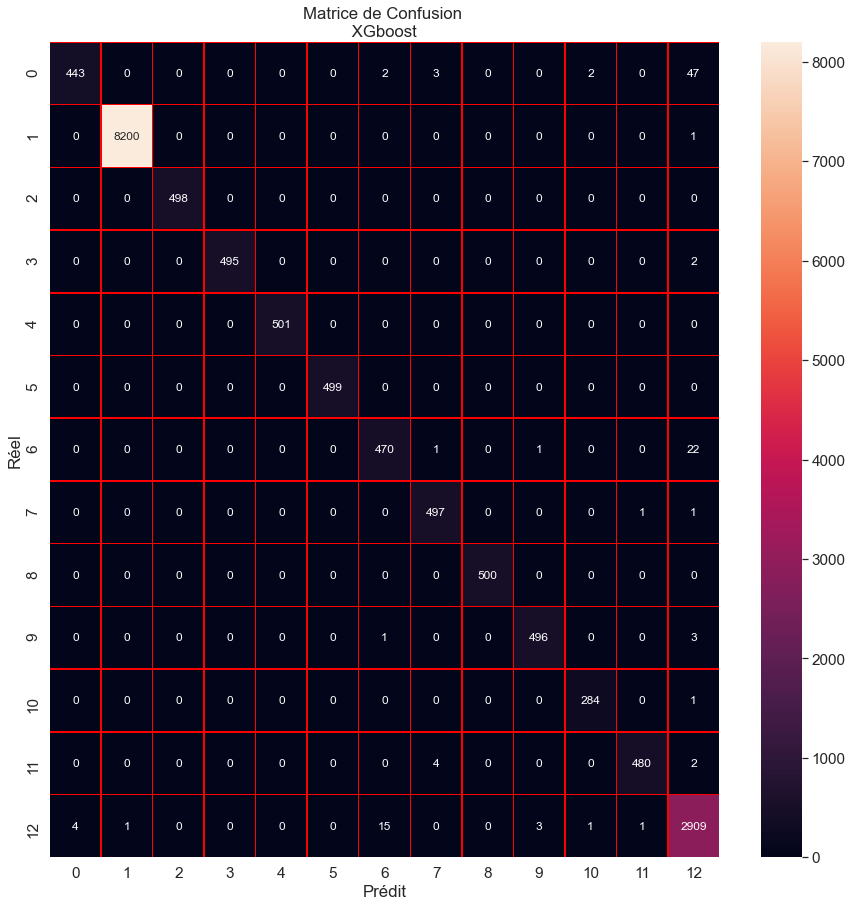

In [19]:
# XGboost training and prediction
xg = xgb.XGBClassifier(learning_rate= 0.1033396951784816, n_estimators = 100, max_depth = 12)
start = time.time()
xg.fit(X_train,y_train) 
end = time.time()
training_time_XG = end - start

# predict
start = time.time()
y_predict = xg.predict(X_test)
end = time.time()
predict_time_XG = end  - start
print('temps entrainement: '+ str(training_time_XG))
print('temps prediction: '+ str(predict_time_XG))
# metrics
confusion = pd.crosstab(y_test, y_predict)
precision_XG, recall_XG, fscore_XG, n = score(y_test, y_predict, average = 'weighted')
accuracy_XG = accuracy_score(y_test, y_predict)
baccuracy_XG=balanced_accuracy_score(y_test, y_predict)
#
#print('baccuracy of ET: '+ str(baccuracy))
print('Exactitude de XGboost : '+ str(accuracy_XG))
print('Précision de XGboost : '+(str(precision_XG)))
print('Taux de détection XGboost : '+(str(recall_XG)))
print('F1-score de XGboost : '+(str(fscore_XG)))

print(classification_report(y_test,y_predict))
#
# plot heat map confusion matrix
plt.figure(figsize = (15,15))
sns.set(font_scale=1.4)
ax = sns.heatmap(confusion, annot=True, linecolor="red",linewidth=0.5,annot_kws={"size": 12}, fmt=".0f") #fmt='g'
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion \n XGboost ')
plt.show()